## Yucatan Peninsula Hurricanes

This study used computer modeling and historical data to analyze the impact of hurricanes across the Yucatan Peninsula from 1851 to 2000. It found significant year-to-year and decade-to-decade variations in hurricane activity, with an overall increase in hurricane intensity since the mid-19th century. The study highlighted a strong spatial gradient in hurricane frequency and intensity across the region, with northeastern areas experiencing more severe storms than southwestern areas. 

Citation:

Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2024-10-24). [https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23](https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23)


In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in file, argument is the file path as a string
df = pd.read_csv('data/hf071-01-hurricanes.csv')
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [6]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.nunique

<bound method DataFrame.nunique of        code  start.date    end.date  number     name  ss track rf.max
0     Y1852  1852-10-07  1852-10-08       5      NaN   2     O     F1
1     Y1857  1857-09-28  1857-09-28       4      NaN   2     N     F1
2     Y1861  1861-08-17  1861-08-17       2      NaN   1     O     Nd
3     Y1864  1864-08-31  1864-08-31       3      NaN   1     S     F1
4     Y1865  1865-09-11  1865-09-11       4      NaN   2     O     F1
..      ...         ...         ...     ...      ...  ..   ...    ...
100  Y1995a  1995-10-01  1995-10-03      15     Opal   1    N*     F0
101  Y1995b  1995-10-10  1995-10-16      17  Roxanne   3     N     F2
102   Y1996  1996-08-20  1996-08-20       4    Dolly   1     N     F1
103   Y1998  1998-10-27  1998-10-28      13    Mitch   5     S     F1
104   Y2000  2000-10-01  2000-10-03      15    Keith   4     S     F2

[105 rows x 8 columns]>

In [11]:
df.shape

(105, 8)

In [28]:
df.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [13]:
na_counts = df.isna().sum()

print(na_counts)

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64


In [34]:
df['start.date'] = pd.to_datetime(df['start.date'])
df['end.date'] = pd.to_datetime(df['end.date'])

In [35]:
cat_5 = df[df['ss'] == 5]

In [36]:
cat_5['duration'] = ((cat_5['end.date'] - cat_5['start.date']).dt.days) + 1

cat_5

/tmp/ipykernel_1846725/1784085599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_5['duration'] = ((cat_5['end.date'] - cat_5['start.date']).dt.days) + 1


,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,1
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,2
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,2
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,2


In [ ]:
# Import libraries
import pandas as pd



In [39]:
(df.loc[df['ss'] == 5].assign(duration = pd.to_datetime(df['end.date']) - pd.to_datetime(df['start.date'])))[['name', 'ss', 'duration']]

,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


BONUS: Visualize Saffor-Simpson categories across time

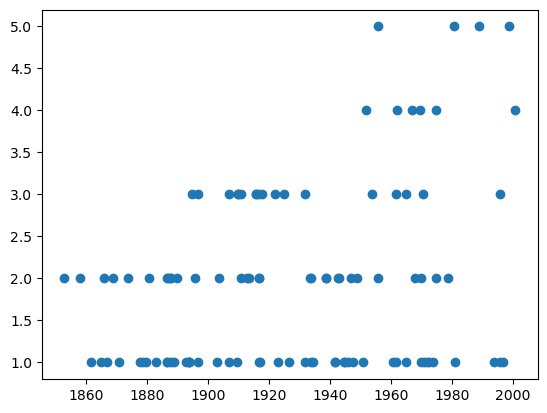

In [44]:
df['start.date'] = pd.to_datetime(df['start.date'])
df['end.date'] = pd.to_datetime(df['end.date'])

plt.figure()
plt.scatter(df['start.date'], df['ss'])